In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [3]:
#loading dataset
data = pd.read_csv(".\dataset\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking mean, min and max values
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

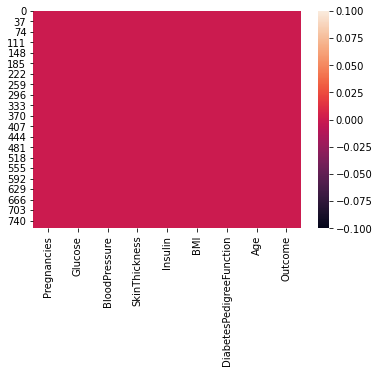

In [6]:
#checking for null values in dataset
print(data.isnull().sum())
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Outcome', ylabel='count'>

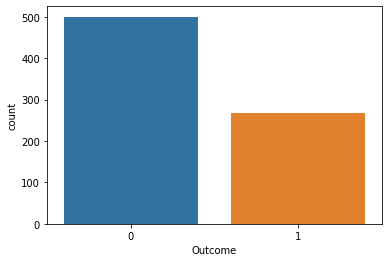

In [7]:
#from here all the plots drawn to understand the dataset to apply best ML model
sns.countplot(x='Outcome',data=data)

<AxesSubplot:xlabel='Age', ylabel='Density'>

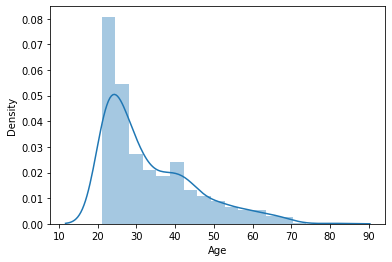

In [8]:
sns.distplot(data['Age'].dropna(),kde=True)

<AxesSubplot:>

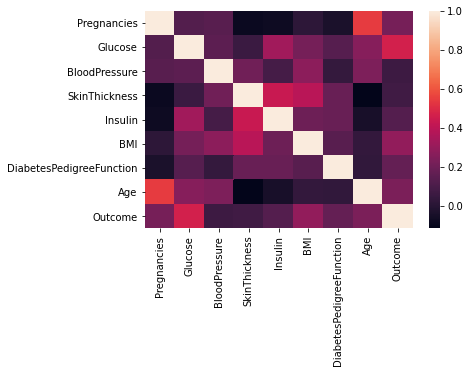

In [9]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Age', ylabel='BMI'>

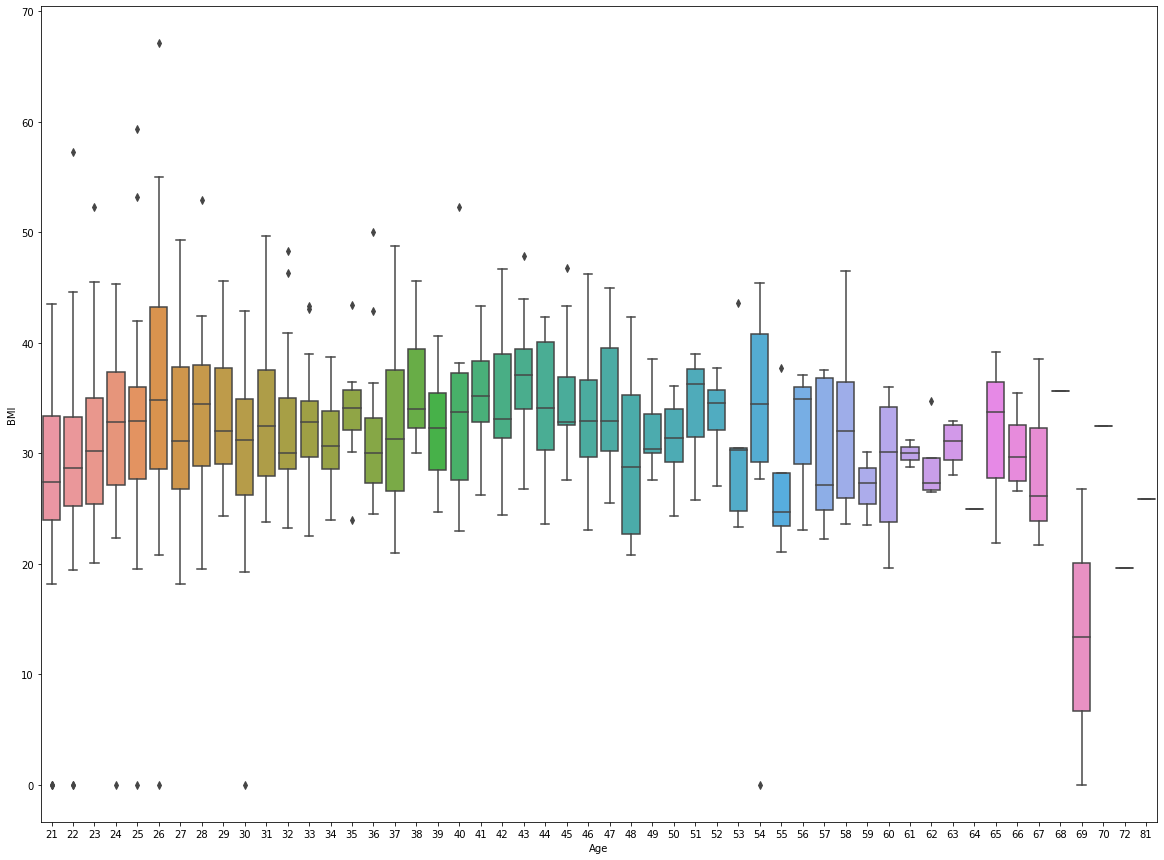

In [10]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='Age', y='BMI', data=data)

In [11]:
#spliting data as x (features) and y (label)
x = data.drop('Outcome',axis=1)
y = data['Outcome']
#splitting data into trainning and test datasets (ration: 70% - train 30% - test)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [12]:
#as by my analysis of dataset LogisticRegression gave best accuracy score
#loading Logistic Regression model and tarinning the model
logModel = LogisticRegression(solver='lbfgs',multi_class='ovr')
logModel.fit(x_train,y_train)
y_pred = logModel.predict(x_test)
score = accuracy_score(y_test,y_pred)
#to print accuracy score
print(f"Test Set Accuracy : {accuracy_score(y_test, y_pred) * 100}\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}") 

Test Set Accuracy : 79.65367965367966

Classification Report : 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.75      0.63      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [13]:
#to dave trained model
joblib.dump(logModel,"diabetes_prediction.ml")

['diabetes_prediction.ml']